# NOTEBOOK NO 4: PCA, kernelPCA,  LDA, NCA, ICA (more below)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition # for PCA, FastICA, KernelPCA, NMF

from mpl_toolkits.mplot3d import Axes3D

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.manifold import TSNE

import imageio # here only for reading images

from scipy import signal


**MNIST dataset** (again)

In [13]:
mnist = datasets.load_digits()
max_n=600
mnist_points =        mnist.data[:max_n]
mnist_data_classes =  mnist.target[:max_n]
mnist_classes_names  =      mnist.target_names

In [ ]:
print("mnist_points.shape = ", mnist_points.shape)
print("mnist_classes_names = ",mnist_classes_names )

mnist_points.shape =  (600, 64)
mnist_classes_names =  [0 1 2 3 4 5 6 7 8 9]


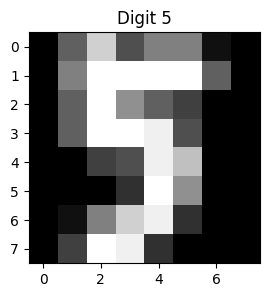

In [14]:
k=33

fig, ax = plt.subplots(figsize=(3,3) )
ax.imshow(mnist_points[k].reshape(8,8), cmap='gray')
ax.set_title('Digit ' + str(mnist_data_classes[k]))
plt.show()

Several dim. red. methods

In [15]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(mnist_points)
mnist_pca_reduced_3d = pca3.transform(mnist_points)



ica3 = decomposition.FastICA(n_components=3)
ica3.fit(mnist_points)
mnist_ica3_reduced_3d = ica3.transform(mnist_points)


kpca3 = decomposition.KernelPCA(kernel="poly",n_components=3, gamma=15) # you may try diff. params
kpca3.fit(mnist_points)
mnist_kpca3_reduced_3d = kpca3.transform(mnist_points)


lda3 = LDA(n_components=3)
lda3.fit_transform(mnist_points, mnist_data_classes) #supervised! uses info on classes
mnist_lda3_reduced_3d = lda3.transform(mnist_points)


nca3 = NCA(max_iter=1500)
nca3.fit(mnist_points, mnist_data_classes) #supervised! uses info on classes
mnist_nca3_reduced_3d = nca3.transform(mnist_points)

print(mnist_pca_reduced_3d.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(600, 3)


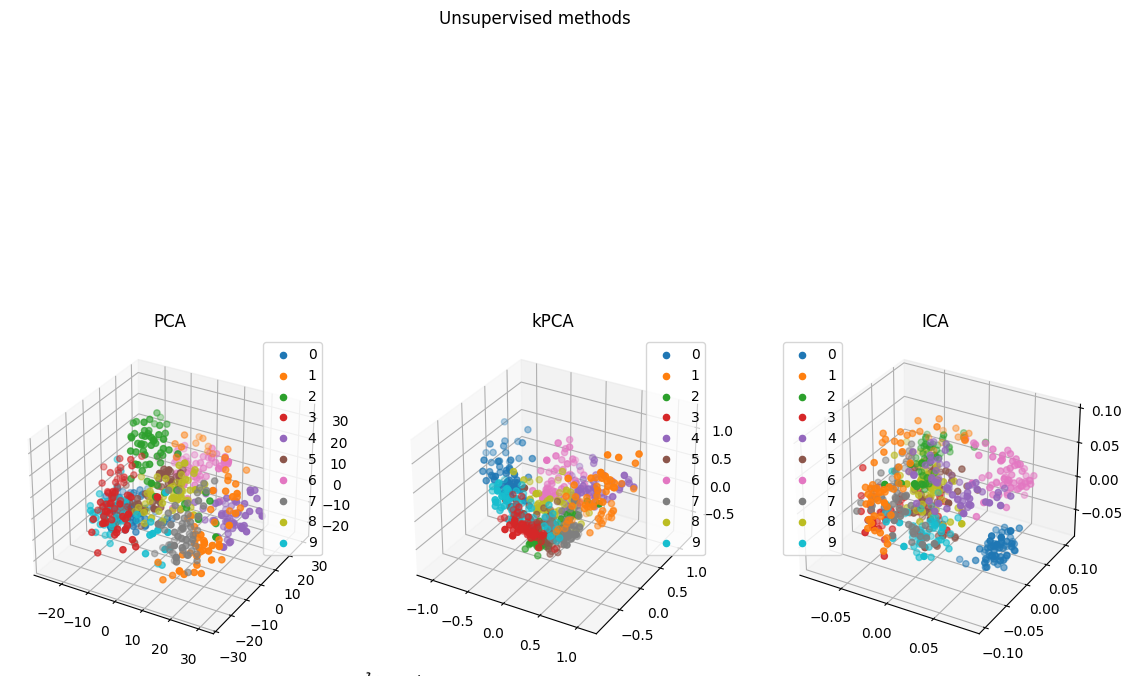

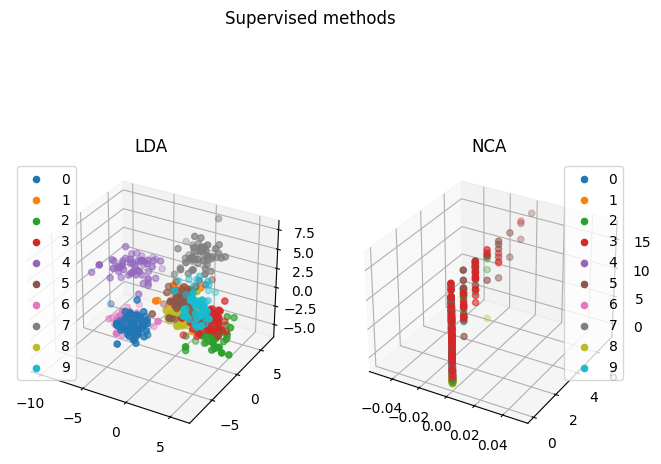

In [16]:
#figure, axis = plt.subplots(2, 2)

fig1 = plt.figure(figsize=(14,10))

ax_pca = fig1.add_subplot(1, 3, 1, projection='3d')
ax_kpca = fig1.add_subplot(1, 3, 2, projection='3d')
ax_ica = fig1.add_subplot(1, 3, 3, projection='3d')
plt.suptitle("Unsupervised methods")

fig2 = plt.figure(figsize=(8,6))
ax_lda = fig2.add_subplot(1, 2, 1, projection='3d')
ax_nca = fig2.add_subplot(1, 2, 2, projection='3d')

plt.suptitle("Supervised methods")

ax_nca.set_title("NCA")
ax_pca.set_title("PCA")
ax_kpca.set_title("kPCA")
ax_ica.set_title("ICA")
ax_lda.set_title("LDA")


for wt in range(0,len(mnist_classes_names)):
    points_pca=mnist_pca_reduced_3d[mnist_data_classes == wt];
    points_kpca=mnist_kpca3_reduced_3d[mnist_data_classes == wt];
    points_ica=mnist_ica3_reduced_3d[mnist_data_classes == wt];
    points_lda=mnist_lda3_reduced_3d[mnist_data_classes == wt];
    points_nca=mnist_nca3_reduced_3d[mnist_data_classes == wt];


    ax_pca.scatter(points_pca[:,0], points_pca[:,1], points_pca[:,2], label=mnist_classes_names[wt])
    ax_kpca.scatter(points_kpca[:,0], points_kpca[:,1], points_kpca[:,2], label=mnist_classes_names[wt])
    ax_ica.scatter(points_ica[:,0], points_ica[:,1], points_ica[:,2], label=mnist_classes_names[wt])
    ax_lda.scatter(points_lda[:,0], points_lda[:,1], points_lda[:,2], label=mnist_classes_names[wt])
    ax_nca.scatter(points_nca[:,0], points_nca[:,1], points_nca[:,2], label=mnist_classes_names[wt])

#ax_pca.legend()


ax_nca.legend()
ax_pca.legend()
ax_kpca.legend()
ax_ica.legend()
ax_lda.legend()

plt.show()


# Q4.1
* Repeat above for IRIS
* Perform above (IRIS and MNIST) reducing data to dim=2

In [17]:
from sklearn import datasets

iris = datasets.load_iris()
max_n = 600
iris_points = iris.data[:max_n]
iris_data_classes = iris.target[:max_n]
iris_classes_names = iris.target_names

print("iris_points.shape =", iris_points.shape)
print("iris_classes_names =", iris_classes_names)




iris_points.shape = (150, 4)
iris_classes_names = ['setosa' 'versicolor' 'virginica']


In [18]:
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA

# PCA
pca3 = decomposition.PCA(n_components=3)
pca3.fit(iris_points)
iris_pca_reduced_3d = pca3.transform(iris_points)

# ICA
ica3 = decomposition.FastICA(n_components=3)
ica3.fit(iris_points)
iris_ica3_reduced_3d = ica3.transform(iris_points)

# Kernel PCA
kpca3 = decomposition.KernelPCA(kernel="poly", n_components=3, gamma=15) # You may try different parameters
kpca3.fit(iris_points)
iris_kpca3_reduced_3d = kpca3.transform(iris_points)

# LDA
lda2 = LDA(n_components=2) #n_components cannot be larger than min(n_features, n_classes - 1). In the Iris dataset, we have 4 features and 3 classes. Therefore, we can't have more than 2 components for LDA
lda2.fit(iris_points, iris_data_classes)  # Supervised! Uses info on classes
iris_lda2_reduced_2d = lda2.transform(iris_points)

# NCA
nca3 = NCA(max_iter=1500, n_components=3)
nca3.fit(iris_points, iris_data_classes)  # Supervised! Uses info on classes
iris_nca3_reduced_3d = nca3.transform(iris_points)

print(iris_pca_reduced_3d.shape)


(150, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


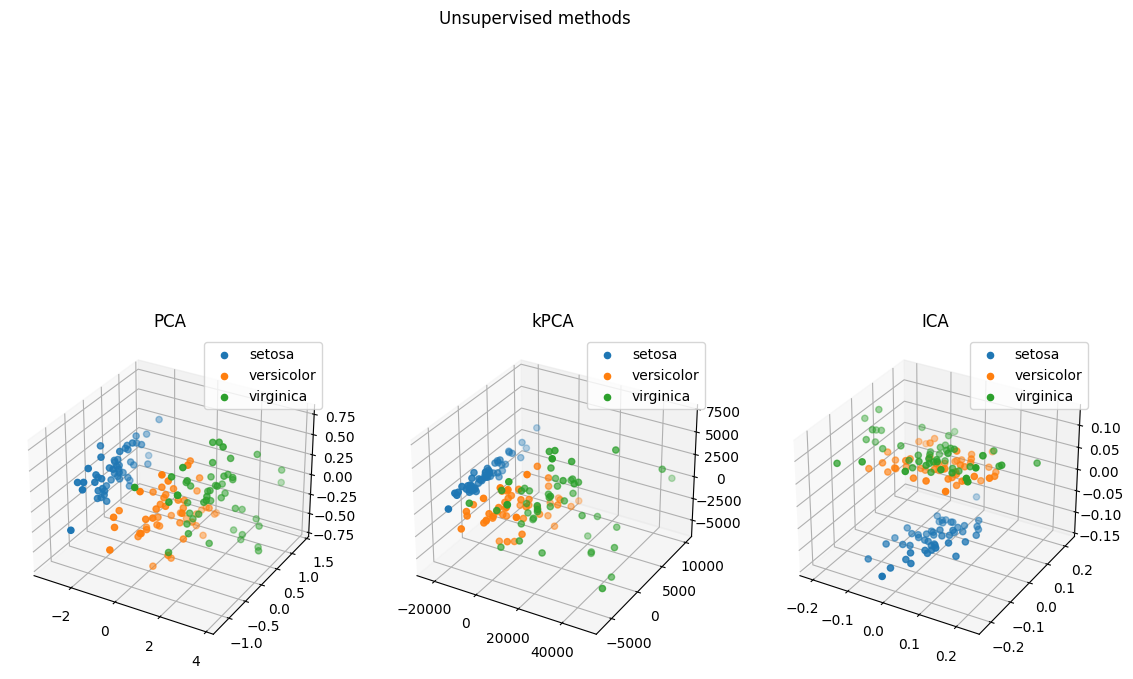

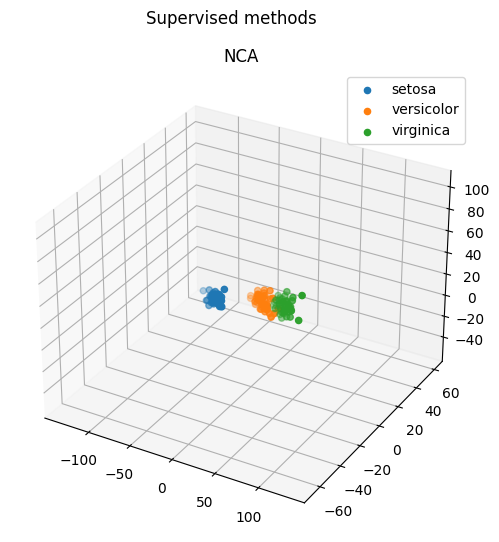

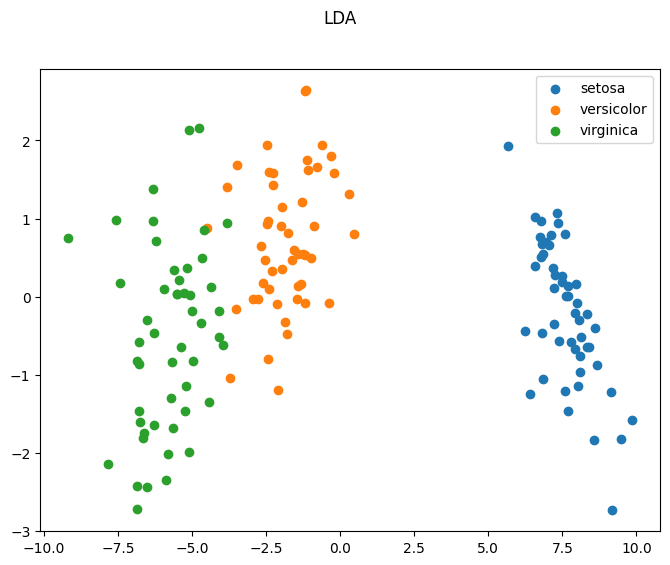

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(figsize=(14, 10))
ax_pca = fig1.add_subplot(1, 3, 1, projection='3d')
ax_kpca = fig1.add_subplot(1, 3, 2, projection='3d')
ax_ica = fig1.add_subplot(1, 3, 3, projection='3d')
plt.suptitle("Unsupervised methods")

fig2 = plt.figure(figsize=(8, 6))
ax_nca = fig2.add_subplot(1, 1, 1, projection='3d')
plt.suptitle("Supervised methods")

# Setting titles
ax_nca.set_title("NCA")
ax_pca.set_title("PCA")
ax_kpca.set_title("kPCA")
ax_ica.set_title("ICA")

# Plotting
for wt in range(0, len(iris_classes_names)):
    points_pca = iris_pca_reduced_3d[iris_data_classes == wt]
    points_kpca = iris_kpca3_reduced_3d[iris_data_classes == wt]
    points_ica = iris_ica3_reduced_3d[iris_data_classes == wt]
    points_nca = iris_nca3_reduced_3d[iris_data_classes == wt]

    ax_pca.scatter(points_pca[:, 0], points_pca[:, 1], points_pca[:, 2], label=iris_classes_names[wt])
    ax_kpca.scatter(points_kpca[:, 0], points_kpca[:, 1], points_kpca[:, 2], label=iris_classes_names[wt])
    ax_ica.scatter(points_ica[:, 0], points_ica[:, 1], points_ica[:, 2], label=iris_classes_names[wt])
    ax_nca.scatter(points_nca[:, 0], points_nca[:, 1], points_nca[:, 2], label=iris_classes_names[wt])

# Plotting LDA separately
fig3 = plt.figure(figsize=(8, 6))
ax_lda = fig3.add_subplot(1, 1, 1)
plt.suptitle("LDA")
for wt in range(0, len(iris_classes_names)):
    points_lda = iris_lda2_reduced_2d[iris_data_classes == wt]
    ax_lda.scatter(points_lda[:, 0], points_lda[:, 1], label=iris_classes_names[wt])

# Adding legends
ax_nca.legend()
ax_pca.legend()
ax_kpca.legend()
ax_ica.legend()
ax_lda.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


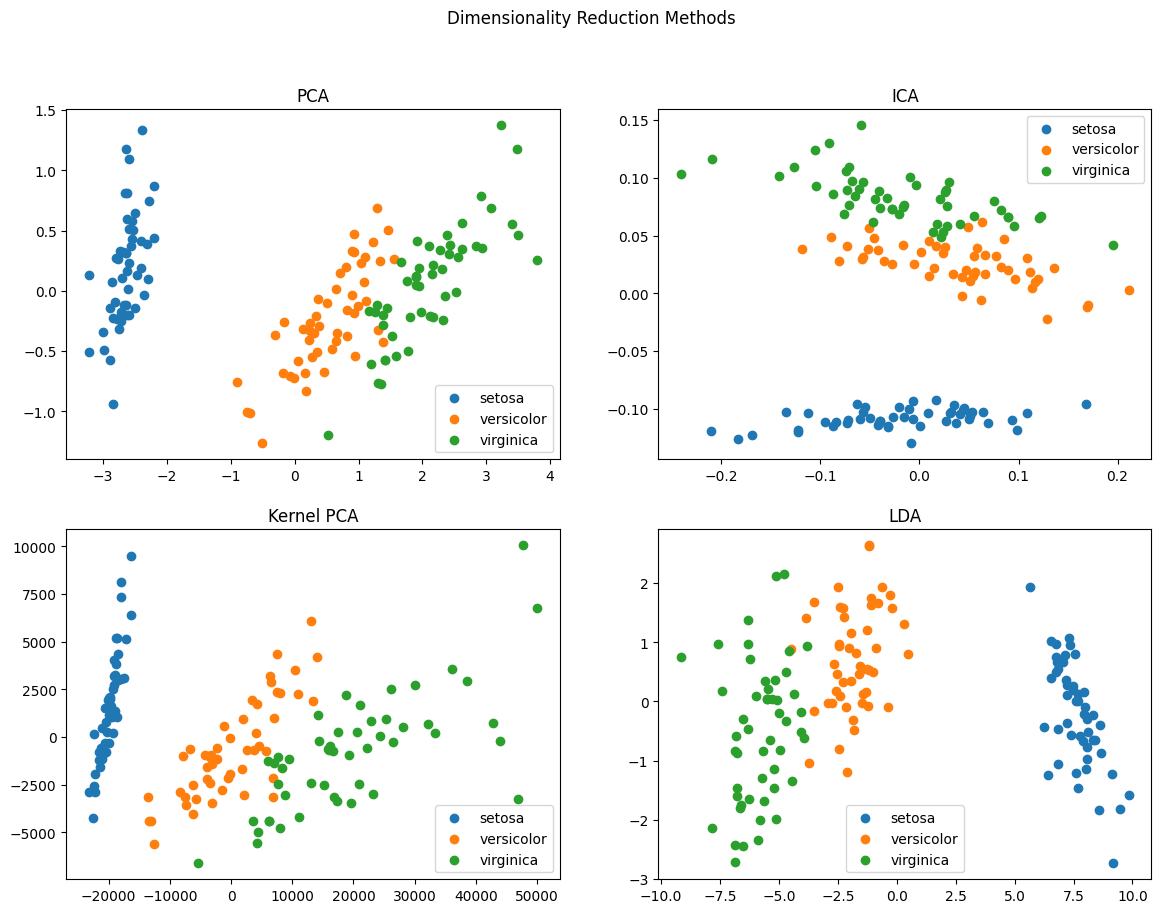

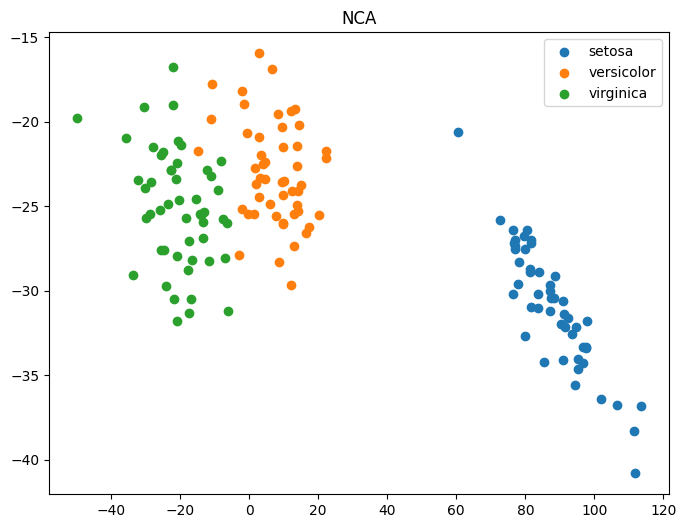

In [35]:
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
import matplotlib.pyplot as plt

# PCA
pca2 = decomposition.PCA(n_components=2)
pca2.fit(iris_points)
iris_pca_reduced_2d = pca2.transform(iris_points)

# ICA
ica2 = decomposition.FastICA(n_components=2)
ica2.fit(iris_points)
iris_ica2_reduced_2d = ica2.transform(iris_points)

# Kernel PCA
kpca2 = decomposition.KernelPCA(kernel="poly", n_components=2, gamma=15) # You may try different parameters
kpca2.fit(iris_points)
iris_kpca2_reduced_2d = kpca2.transform(iris_points)

# LDA
lda2 = LDA(n_components=2)
lda2.fit(iris_points, iris_data_classes)  # Supervised! Uses info on classes
iris_lda2_reduced_2d = lda2.transform(iris_points)

# NCA
nca2 = NCA(max_iter=1500, n_components=2)
nca2.fit(iris_points, iris_data_classes)  # Supervised! Uses info on classes
iris_nca2_reduced_2d = nca2.transform(iris_points)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle("Dimensionality Reduction Methods")

# PCA plot
axs[0, 0].set_title("PCA")
for wt in range(len(iris_classes_names)):
    points_pca = iris_pca_reduced_2d[iris_data_classes == wt]
    axs[0, 0].scatter(points_pca[:, 0], points_pca[:, 1], label=iris_classes_names[wt])

# ICA plot
axs[0, 1].set_title("ICA")
for wt in range(len(iris_classes_names)):
    points_ica = iris_ica2_reduced_2d[iris_data_classes == wt]
    axs[0, 1].scatter(points_ica[:, 0], points_ica[:, 1], label=iris_classes_names[wt])

# Kernel PCA plot
axs[1, 0].set_title("Kernel PCA")
for wt in range(len(iris_classes_names)):
    points_kpca = iris_kpca2_reduced_2d[iris_data_classes == wt]
    axs[1, 0].scatter(points_kpca[:, 0], points_kpca[:, 1], label=iris_classes_names[wt])

# LDA plot
axs[1, 1].set_title("LDA")
for wt in range(len(iris_classes_names)):
    points_lda = iris_lda2_reduced_2d[iris_data_classes == wt]
    axs[1, 1].scatter(points_lda[:, 0], points_lda[:, 1], label=iris_classes_names[wt])

# NCA plot
fig2, ax_nca = plt.subplots(figsize=(8, 6))
plt.title("NCA")
for wt in range(len(iris_classes_names)):
    points_nca = iris_nca2_reduced_2d[iris_data_classes == wt]
    ax_nca.scatter(points_nca[:, 0], points_nca[:, 1], label=iris_classes_names[wt])

# Adding legends
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()
ax_nca.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


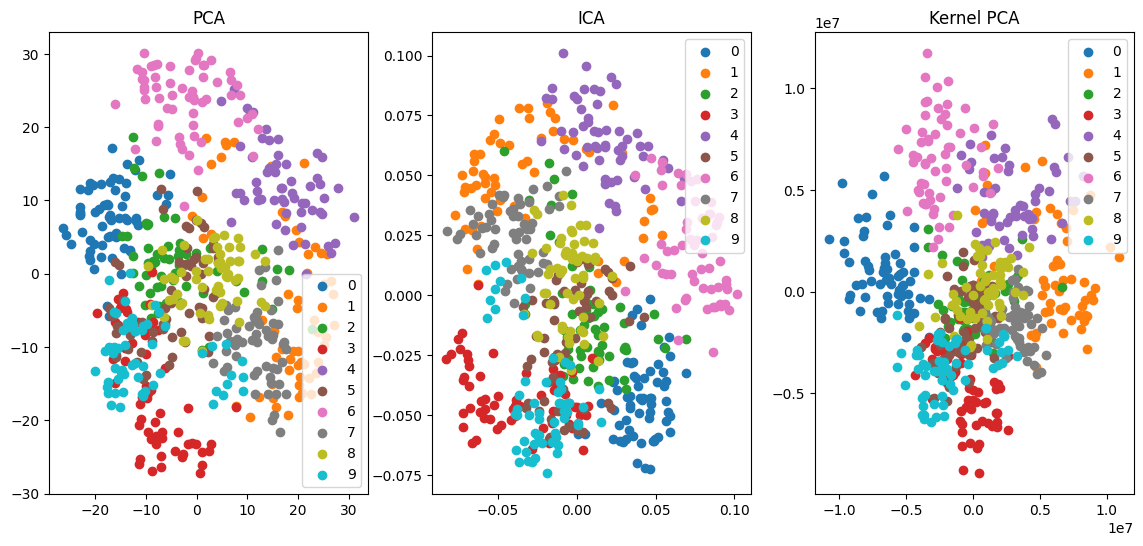

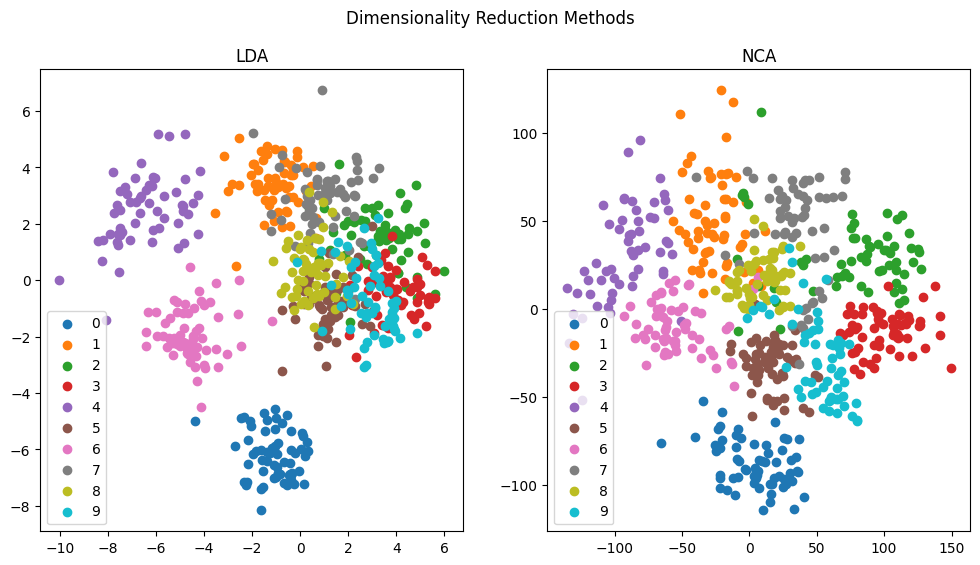

In [36]:
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
import matplotlib.pyplot as plt

# PCA
pca2 = decomposition.PCA(n_components=2)
pca2.fit(mnist_points)
mnist_pca_reduced_2d = pca2.transform(mnist_points)

# ICA
ica2 = decomposition.FastICA(n_components=2)
ica2.fit(mnist_points)
mnist_ica2_reduced_2d = ica2.transform(mnist_points)

# Kernel PCA
kpca2 = decomposition.KernelPCA(kernel="poly", n_components=2, gamma=15)
kpca2.fit(mnist_points)
mnist_kpca2_reduced_2d = kpca2.transform(mnist_points)

# LDA
lda2 = LDA(n_components=2)
lda2.fit(mnist_points, mnist_data_classes)
mnist_lda2_reduced_2d = lda2.transform(mnist_points)

# NCA
nca2 = NCA(max_iter=1500, n_components=2)
nca2.fit(mnist_points, mnist_data_classes)
mnist_nca2_reduced_2d = nca2.transform(mnist_points)

# Plotting
fig1, axs1 = plt.subplots(1, 3, figsize=(14, 6))
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle("Dimensionality Reduction Methods")

# PCA plot
axs1[0].set_title("PCA")
for wt in range(len(mnist_classes_names)):
    points_pca = mnist_pca_reduced_2d[mnist_data_classes == wt]
    axs1[0].scatter(points_pca[:, 0], points_pca[:, 1], label=mnist_classes_names[wt])

# ICA plot
axs1[1].set_title("ICA")
for wt in range(len(mnist_classes_names)):
    points_ica = mnist_ica2_reduced_2d[mnist_data_classes == wt]
    axs1[1].scatter(points_ica[:, 0], points_ica[:, 1], label=mnist_classes_names[wt])

# Kernel PCA plot
axs1[2].set_title("Kernel PCA")
for wt in range(len(mnist_classes_names)):
    points_kpca = mnist_kpca2_reduced_2d[mnist_data_classes == wt]
    axs1[2].scatter(points_kpca[:, 0], points_kpca[:, 1], label=mnist_classes_names[wt])

# LDA plot
axs2[0].set_title("LDA")
for wt in range(len(mnist_classes_names)):
    points_lda = mnist_lda2_reduced_2d[mnist_data_classes == wt]
    axs2[0].scatter(points_lda[:, 0], points_lda[:, 1], label=mnist_classes_names[wt])

# NCA plot
axs2[1].set_title("NCA")
for wt in range(len(mnist_classes_names)):
    points_nca = mnist_nca2_reduced_2d[mnist_data_classes == wt]
    axs2[1].scatter(points_nca[:, 0], points_nca[:, 1], label=mnist_classes_names[wt])

# Adding legends
for ax in axs1:
    ax.legend()
for ax in axs2:
    ax.legend()

plt.show()


# ICA

In [22]:

np.random.seed(0)

n=1000

grid = np.linspace(0, 250, n)

# Sources
S = np.array([np.cos(grid),                   # cos
              signal.sawtooth(grid * 1.9),      # some signal
              np.random.random(len(grid))])   # rand UNIFORM(0,1)

print(S.shape)

(3, 1000)


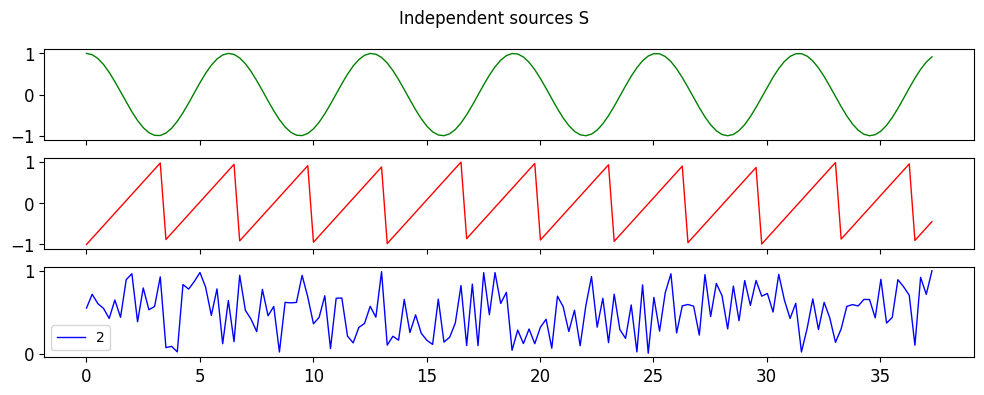

In [23]:


fig, ax = plt.subplots(3, 1, figsize=[12, 4], sharex=True)
clrs=["green","red","blue","cyan", "magenta","black"]
plt.suptitle("Independent sources S")
for i in np.arange(3):
  ax[i].plot(grid[:150], S[i,:150], lw=1,  color=clrs[i], label=str(i))
  ax[i].tick_params(labelsize=12)

plt.legend()
plt.show()



In [24]:
# Mixing coefficients
A = np.array([[0.5, 1, 0.2],
              [1, 0.5, 0.4],
              [0.5, 0.8, 1]])

# Observations = mixed signal
X = A.dot(S) # S.dot(A).T

In [25]:
X.shape

(3, 1000)

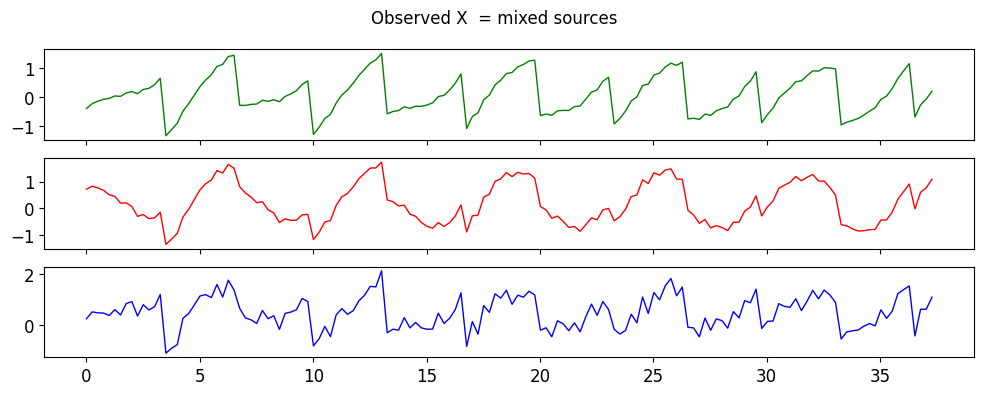

In [26]:
fig, ax = plt.subplots(3, 1, figsize=[12, 4], sharex=True)
clrs=["green","red","blue","cyan", "magenta","black"]
plt.suptitle("Observed X  = mixed sources")
for i in np.arange(3):
  ax[i].plot(grid[:150], X[i,:150], lw=1,  color=clrs[i])
  ax[i].tick_params(labelsize=12)



In [27]:
# Compute ICA
ica = decomposition.FastICA(n_components=3, whiten='unit-variance')
S_reconstructed = ica.fit_transform(X.T).T  # Reconstruct signals
A_reconstructed = ica.mixing_  # Get estimated mixing matrix


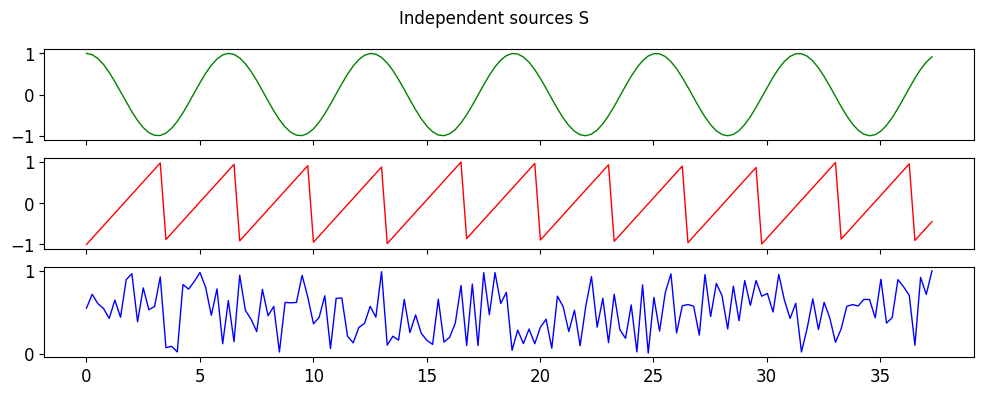

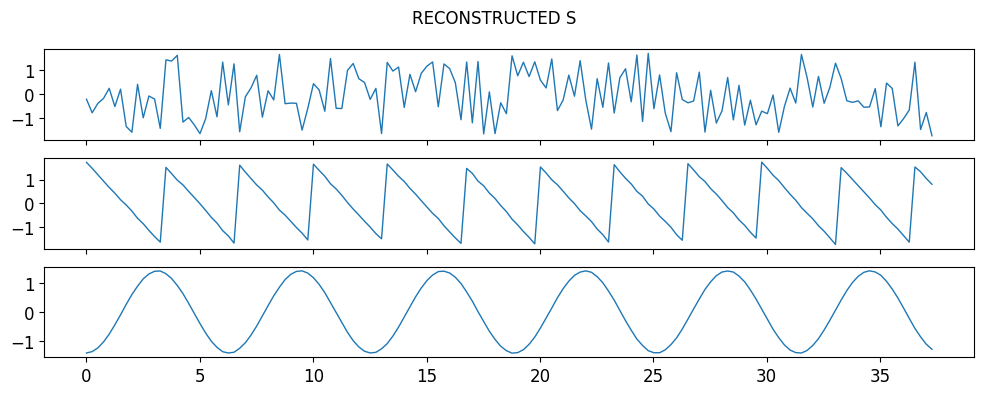

In [28]:
fig, ax = plt.subplots(3, 1, figsize=[12, 4], sharex=True)
clrs=["green","red","blue","cyan", "magenta","black"]
plt.suptitle("Independent sources S")
for i in np.arange(3):
  ax[i].plot(grid[:150], S[i,:150], lw=1,  color=clrs[i])
  ax[i].tick_params(labelsize=12)

plt.show()
fig, ax = plt.subplots(3, 1, figsize=[12, 4], sharex=True)
plt.suptitle("RECONSTRUCTED S")
for i in np.arange(3):
  ax[i].plot(grid[:150], S_reconstructed[i,:150], lw=1)
  ax[i].tick_params(labelsize=12)
plt.show()

### Fingerprints

In [29]:
fp1 = img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/fp1.png',pilmode='L')
fp2 = img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/fp2.png',pilmode='L')
fp3 = img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/fp3.png',pilmode='L')


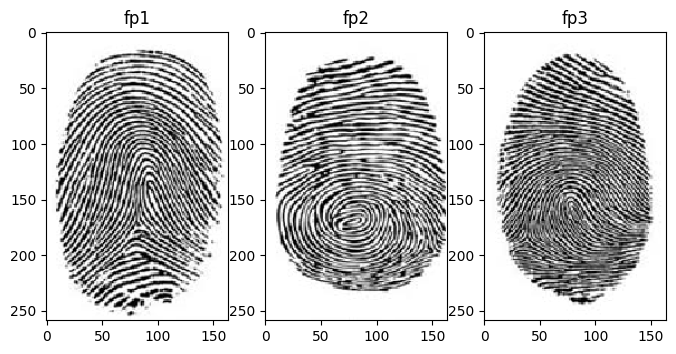

In [30]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(fp1,cmap='gray')
ax2.imshow(fp2,cmap='gray')
ax3.imshow(fp3,cmap='gray')
ax1.set_title("fp1")
ax2.set_title("fp2")
ax3.set_title("fp3")
plt.show()

In [31]:
h,w = fp1.shape # we assume fp1,  fp2, fp3 are of the same size
n=h*w
print(h,w)
print(n)

259 164
42476


# Q4.2
* Construct $\mathbf{S}$ of size $3\times n$, each row correspond to an image (reshaped to a vector of size $n$)
* Consider mixing matrices:
$$\mathbf{A}_1=\left[\begin{array}{llll}
5 & 10 & 0 \\
10 & 0 & 40 \\
0 & 18 & 50
\end{array}\right],\qquad  
\mathbf{A}_2=\left[\begin{array}{llll}
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1
\end{array}\right]$$
* $\mathbf{X}=\mathbf{A} \mathbf{S}$ is a $3\times n$ matrix with mixed signals. Reshape each row of $\mathbf{X}$ back to $h\times w$ and plot as grayscale image.
* Using ICA try to reconstruct $\mathbf{S}$ from $\mathbf{X}$. Were you able to reconstruct at least one fingerprint? Try also normalizing $\mathbf{X}$ first (e.g., each row to have mean 0 and std=1).

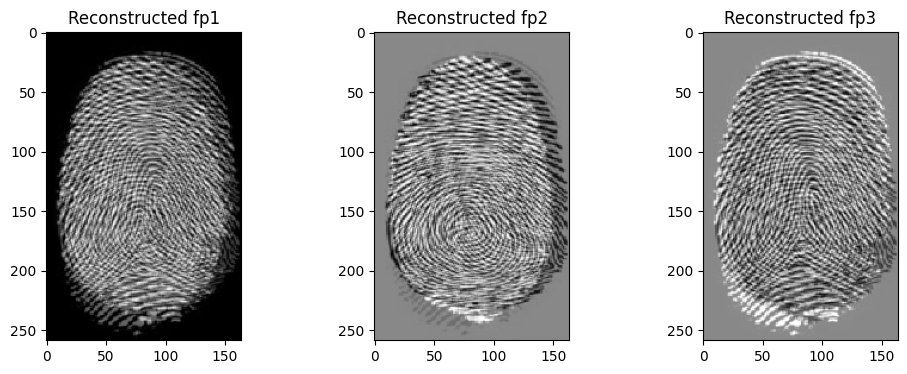

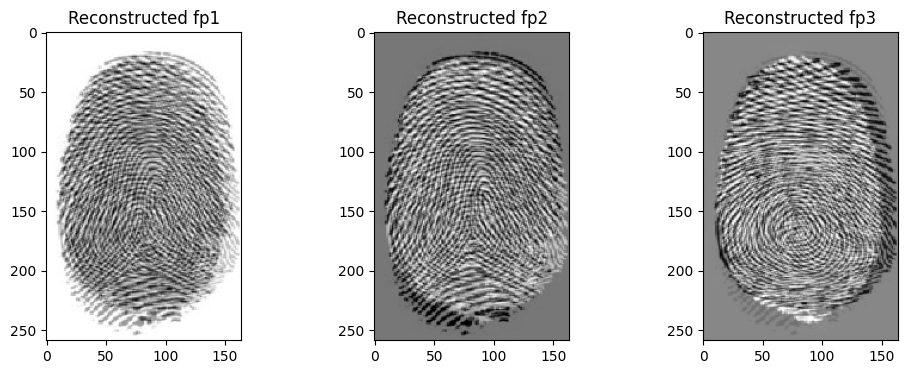

In [32]:
import matplotlib.pyplot as plt

S = np.zeros((3, n))
S[0, :] = fp1.reshape(-1)
S[1, :] = fp2.reshape(-1)
S[2, :] = fp3.reshape(-1)

A_1= np.array([[5, 10, 0],
              [10, 0, 40],
              [0, 18, 50]])

A_2= np.array([[1,1,0],
              [0,1,1],
              [1,0,1]])

X=A_1.dot(S)


ica = decomposition.FastICA(n_components=3, whiten='unit-variance')
S_reconstructed = ica.fit_transform(X.T).T
A_reconstructed = ica.mixing_  # Get estimated mixing matrix

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    reconstructed_image = S_reconstructed[i, :].reshape(h, w)
    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f"Reconstructed fp{i+1}")

plt.show()

X=A_2.dot(S)


ica = decomposition.FastICA(n_components=3, whiten='unit-variance')
S_reconstructed = ica.fit_transform(X.T).T
A_reconstructed = ica.mixing_  # Get estimated mixing matrix

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    reconstructed_image = S_reconstructed[i, :].reshape(h, w)
    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f"Reconstructed fp{i+1}")

plt.show()

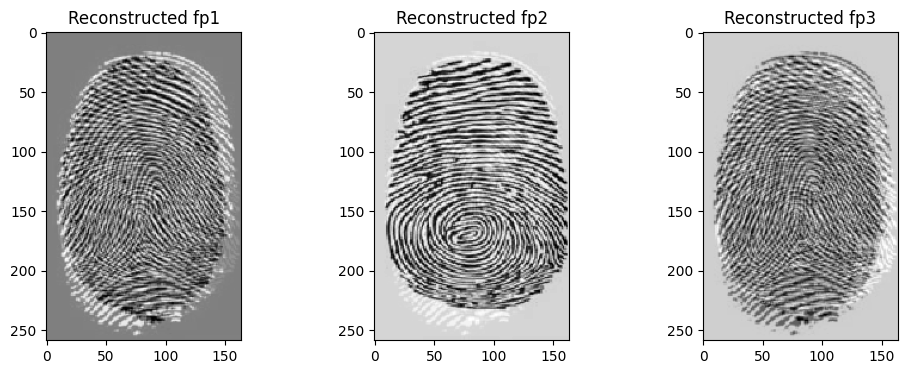

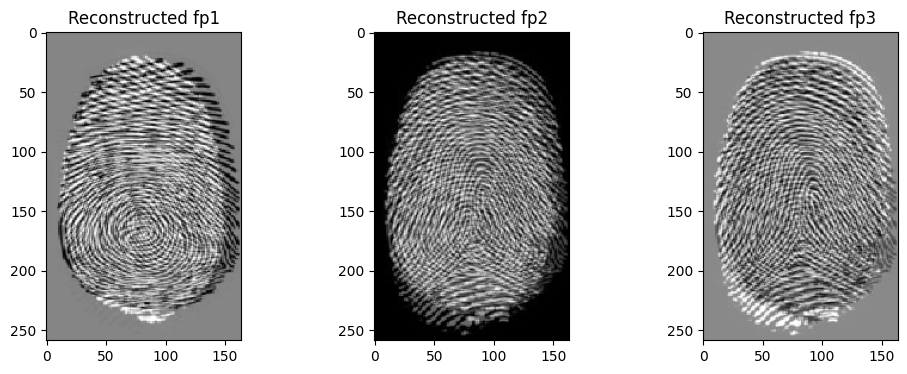

In [34]:
# WITH NORMALIZING X

import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

S = np.zeros((3, n))
S[0, :] = fp1.reshape(-1)
S[1, :] = fp2.reshape(-1)
S[2, :] = fp3.reshape(-1)

A_1= np.array([[5, 10, 0],
              [10, 0, 40],
              [0, 18, 50]])

A_2= np.array([[1,1,0],
              [0,1,1],
              [1,0,1]])

X=A_1.dot(S)
normed_matrix = normalize(X, axis=1, norm='l1')

ica = decomposition.FastICA(n_components=3, whiten='unit-variance')
S_reconstructed = ica.fit_transform(X.T).T
A_reconstructed = ica.mixing_
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    reconstructed_image = S_reconstructed[i, :].reshape(h, w)
    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f"Reconstructed fp{i+1}")

plt.show()

X=A_2.dot(S)
normed_matrix = (X-np.mean(X))/np.std(X)

ica = decomposition.FastICA(n_components=3, whiten='unit-variance')
S_reconstructed = ica.fit_transform(X.T).T
A_reconstructed = ica.mixing_
fig, axes = plt.subplots(1, 3, figsize=(12, 4))


for i in range(3):
    reconstructed_image = S_reconstructed[i, :].reshape(h, w)
    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f"Reconstructed fp{i+1}")

plt.show()